In [1]:
# Preprocessing data
#    Objectif: preprocessing data with encoding,scaling,PCA
#    Input: cleanedData.csv
#    Output: 
#     preprocessed data without PCA:
#        x_train.csv 
#        y_train.csv 
#        x_test.csv 
#        y_test.csv 
#    preprocessed data with PCA:
#        x_pca_train.csv 
#        y_pca_train.csv 

#    Author: SOUAD BOUTANE - NARGES ROKNI

In [1]:

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#Split data
from sklearn.model_selection import train_test_split

# Import the 3 dimensionality reduction methods
from sklearn.decomposition import PCA

#standardization
from sklearn.preprocessing import StandardScaler

#subplot
from pylab import *

In [7]:
######################################   LOAD CLEANED DATA   ################################
df = pd.read_csv('../data/cleanedData.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768088 entries, 0 to 2768087
Data columns (total 9 columns):
step                int64
HourOfDay           int64
type                object
amount              float64
balanceSender       float64
balanceReceiver     float64
errorBalanceDest    float64
errorBalanceOrig    float64
isFraud             int64
dtypes: float64(5), int64(3), object(1)
memory usage: 190.1+ MB


In [8]:
####################################    DATA PREPROCESSING     ################################
##################################### Categorical Variable ####################################

# --------- OnHot-encoding of labelled data in 'type'  TRANSFER = 1, CASH_OUT = 0
one_hot = pd.get_dummies(df['type'])
df = df.drop('type',axis = 1)
df = df.join(one_hot)


In [9]:
####################################    DATA PREPROCESSING     ################################
  #####################################  Split data ###################################

# ---------- Split data to tarin and target
y_data = df['isFraud']
x_data = df.drop(['isFraud'],axis=1)

#-------------------Split data to training=60% and test=40%
X_train, X_test, Y_train, Y_test=train_test_split(x_data, y_data, test_size=0.4)
p=100*float(sum(x == 1 for x in Y_train))/Y_train.size
q=100*float(sum(x == 1 for x in Y_test))/Y_test.size
r=100*float(sum(x == 1 for x in y_data))/y_data.size

print("Dataset       : ",y_data.size,'with %.4f'% r,'% fraudulent transactions')
print("Data training : ",Y_train.size,'with %.4f'% p,'% fraudulent transactions')
print("Data test     : ",Y_test.size,'with %.4f'% q,'% fraudulent transactions')


Dataset       :  2768088 with 0.2967 % fraudulent transactions
Data training :  1660852 with 0.2987 % fraudulent transactions
Data test     :  1107236 with 0.2937 % fraudulent transactions


In [10]:
print('the number of fraud transcation in data training is :',sum(x == 1 for x in Y_train))
print('the number of genuine transcation in data training is :',sum(x != 1 for x in Y_train))

the number of fraud transcation in data training is : 4961
the number of genuine transcation in data training is : 1655891


In [11]:
####################################    DATA PREPROCESSING     ################################
##################################### Standardize the data ####################################


scaler = StandardScaler()

#get trainingX and test X
x = X_train.values
x_ = X_test.values

#fir for training
scaler.fit(x)

#for test data
X_test = scaler.transform(x_)
X_train = scaler.transform(x)

#change output from 0/1 to -1/1
#Y_train=mod(Y_train,2)*2-1
#Y_test=mod(Y_test,2)*2-1

In [12]:
#Save dataTraining and dataTest
np.savetxt('../data/x_train.csv', X_train, delimiter=",")
np.savetxt('../data/y_train.csv', Y_train, delimiter=",")
np.savetxt('../data/x_test.csv', X_test, delimiter=",")
np.savetxt('../data/y_test.csv', Y_test, delimiter=",")

we need  4  dimesion to explain 80% of the variance 


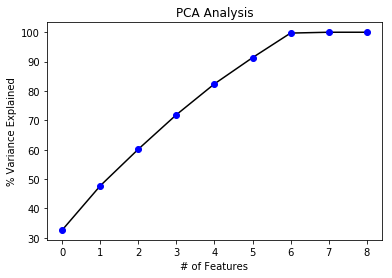

In [13]:
####################################    DATA PREPROCESSING     ################################

#----------------- PCA : singular value decomposition SVD ---------------

# Calculating Eigenvectors and eigenvalues of Cov matirx
mean_vec = np.mean(X_train, axis=0)
cov_mat = np.cov(X_train.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the eigenvalue, eigenvector pair from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)



# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

#plot 
plt.plot(cum_var_exp, 'k',cum_var_exp, 'bo')
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')

# Find the eigenvector beyond which 90% of the data is explained
d=[ n for n,i in enumerate(cum_var_exp) if i>80 ][0]
print('we need ', d,' dimesion to explain 80% of the variance ')
#So, we need 2 eigenvectors to explain 90% of the variance. So, let us reshape our training data matrix into a 42000*228 
#matrix with each column corresponding to the projections onto the eigenvectors.



In [14]:
####################################    DATA PREPROCESSING     ################################

#----------------- PCA : singular value decomposition SVD ---------------
# Call the PCA method with 4 components. 
pca_train = PCA(n_components=d)

pca_train.fit(X_train)
X_pca_train = pca_train.transform(X_train)
print("Data training size", X_pca_train.shape)

pca_test = PCA(n_components=d)
pca_test.fit(X_test)
X_pca_test = pca_test.transform(X_test)
print("Data test size", X_pca_test.shape)

#plt.scatter(X_train[:, 0], X_train[:, 1],X_train[:], edgecolor='none', alpha=0.5)
#plt.xlabel('component 1')
#plt.ylabel('component 2')



Data training size (1660852, 4)
Data test size (1107236, 4)


In [15]:
#Save dataTraining and dataTest
np.savetxt('../data/pca/x_pca_train.csv', X_pca_train, delimiter=",")
np.savetxt('../data/pca/x_pca_test.csv', X_pca_test, delimiter=",")